In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train=pd.read_csv('train.csv')
validation=pd.read_csv('validation.csv')

In [5]:
train.head()

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,BPCRGRYCXPI,silent
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,UE4OHIQ6JJO,noise
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,N0B0Z81N2KQ,noise
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,IL6D7IEAKXH,silent
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,6VKOI64H5QS,silent


In [6]:
validation.head()

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-28.718139,0.036679,-5.857863e-08,0.000275,0.036679,-0.000031,LBJG6IRRNJT,silent
1,-21.730113,0.081726,-5.130002e-06,-0.103353,0.081726,-0.000031,K0N0FWSJH6Q,noise
2,-23.006730,0.070743,-9.530798e-04,0.001740,0.070736,-0.000977,CI3K3E36QFM,silent
3,-40.824673,0.009223,-2.243036e-05,-0.011938,0.009223,-0.000061,908RKO7BJWD,noise
4,-25.069475,0.052199,-2.454277e-04,0.000000,0.052199,-0.000244,OQU84RQS7AV,noise


In [8]:
# first change the train dataset
train

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,BPCRGRYCXPI,silent
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,UE4OHIQ6JJO,noise
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,N0B0Z81N2KQ,noise
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,IL6D7IEAKXH,silent
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,6VKOI64H5QS,silent
...,...,...,...,...,...,...,...,...
1995,-30.466769,0.029989,-1.134274e-05,0.000305,0.029989,-0.000031,9FNSYNKBSZV,silent
1996,-33.258062,0.021791,-2.203779e-05,-0.062787,0.021791,-0.000022,H1G0X0CBUJ9,noise
1997,-25.300599,0.054325,-3.338114e-03,-0.003296,0.054223,-0.003357,UUJDVM3814Z,silent
1998,-14.004087,0.200655,-6.724937e-06,-0.427449,0.200655,-0.000031,22SVX2DM54G,noise


In [9]:
train.shape

(2000, 8)

In [10]:
train.isnull().sum()

dbfs        0
rms         0
avg         0
mode        0
std         0
dcoffset    0
filename    0
target      0
dtype: int64

In [13]:
train['target'].unique()

array(['silent', 'noise'], dtype=object)

In [14]:
# change the target value to numerical form
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
train['target']=encoder.fit_transform(train['target'])

In [15]:
train.head()

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,BPCRGRYCXPI,1
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,UE4OHIQ6JJO,0
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,N0B0Z81N2KQ,0
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,IL6D7IEAKXH,1
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,6VKOI64H5QS,1


Ok so here 1 ---> silent
        

0 ----> Noise

In [19]:
# Lets drop the filename as here it doesnot have any meaning to keep the file during training

In [20]:
train=train.drop(columns=['filename'])

In [21]:
train

,dbfs,rms,avg,mode,std,dcoffset,target
0,-23.342901,0.068081,9.726773e-06,0.000000,0.068081,0.000000,1
1,-32.613091,0.023555,-1.376716e-05,-0.033556,0.023555,-0.000061,0
2,-33.918120,0.020217,-2.388173e-05,-0.020961,0.020217,-0.000061,0
3,-28.287812,0.038521,-2.014348e-06,0.000122,0.038521,-0.000031,1
4,-24.189081,0.061746,-6.716756e-07,-0.000122,0.061746,-0.000031,1
...,...,...,...,...,...,...,...
1995,-30.466769,0.029989,-1.134274e-05,0.000305,0.029989,-0.000031,1
1996,-33.258062,0.021791,-2.203779e-05,-0.062787,0.021791,-0.000022,0
1997,-25.300599,0.054325,-3.338114e-03,-0.003296,0.054223,-0.003357,1
1998,-14.004087,0.200655,-6.724937e-06,-0.427449,0.200655,-0.000031,0


In [22]:
train.describe()

,dbfs,rms,avg,mode,std,dcoffset,target
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-24.365061,0.076494,-0.000208,-0.078601,0.076394,-0.001530,0.500000
std,8.112060,0.063158,0.005856,0.160891,0.063007,0.014291,0.500125
min,-67.845098,0.000406,-0.012704,-1.218606,0.000406,-0.257812,0.000000
25%,-27.517713,0.041780,-0.000136,-0.093902,0.041780,-0.000178,0.000000
50%,-24.031654,0.061847,-0.000014,-0.001987,0.061847,-0.000031,0.500000
75%,-21.093569,0.086572,0.000004,0.000000,0.086543,0.000000,1.000000
max,38.687602,0.463202,0.080826,0.999939,0.463201,0.024780,1.000000


In [23]:
corr=train.corr()

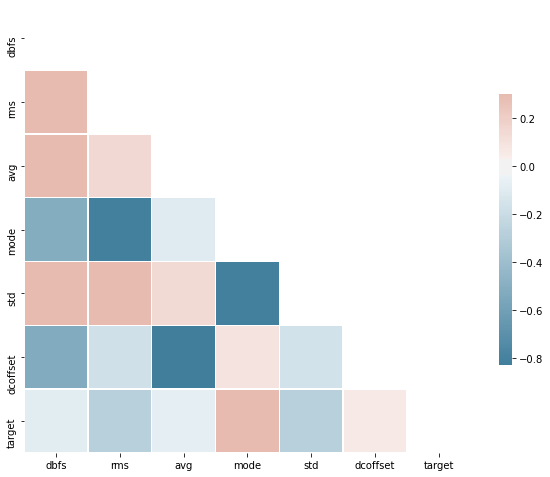

In [27]:
import seaborn as sns
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [28]:
# ohk so mode give us high corelation so remove that

In [29]:
train=train.drop(columns=['mode'])

In [30]:
train.head()

,dbfs,rms,avg,std,dcoffset,target
0,-23.342901,0.068081,9.726773e-06,0.068081,0.000000,1
1,-32.613091,0.023555,-1.376716e-05,0.023555,-0.000061,0
2,-33.918120,0.020217,-2.388173e-05,0.020217,-0.000061,0
3,-28.287812,0.038521,-2.014348e-06,0.038521,-0.000031,1
4,-24.189081,0.061746,-6.716756e-07,0.061746,-0.000031,1


In [31]:
corr=train.corr()

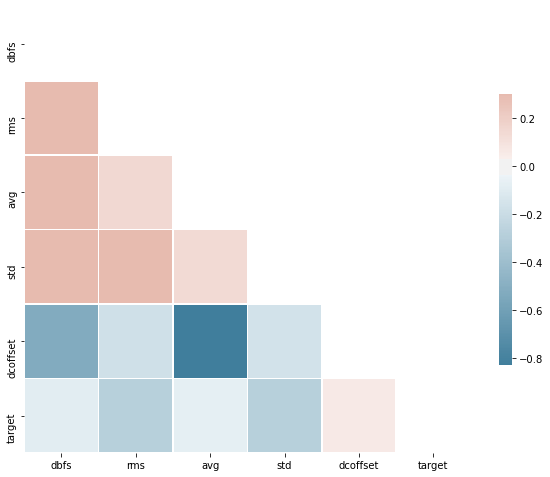

In [32]:
plt.figure(figsize=(10,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

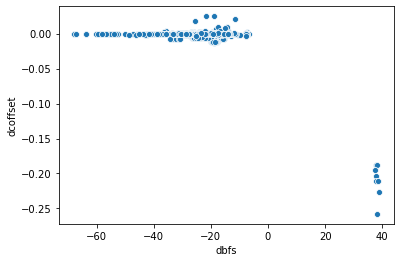

In [37]:
sns.scatterplot(data=train,x='dbfs',y='dcoffset')

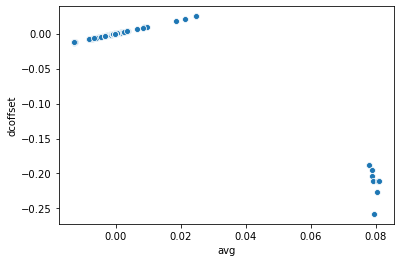

In [38]:
sns.scatterplot(data=train,x='avg',y='dcoffset')

# Ok so as we see a plot of cooraltion in the matrix between thee 2 but i think as the dataset is of 2000 rows and if 10 datapoints are not following that part then i think it must be ok 

Lets train the model with these features

In [48]:
# Split train in X and Y for trainig purpose
X=train.drop(columns=['target'])
y=train['target']

In [50]:
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# now perform same steps for Validation

In [53]:
validation

,dbfs,rms,avg,mode,std,dcoffset,filename,target
0,-28.718139,0.036679,-5.857863e-08,0.000275,0.036679,-0.000031,LBJG6IRRNJT,silent
1,-21.730113,0.081726,-5.130002e-06,-0.103353,0.081726,-0.000031,K0N0FWSJH6Q,noise
2,-23.006730,0.070743,-9.530798e-04,0.001740,0.070736,-0.000977,CI3K3E36QFM,silent
3,-40.824673,0.009223,-2.243036e-05,-0.011938,0.009223,-0.000061,908RKO7BJWD,noise
4,-25.069475,0.052199,-2.454277e-04,0.000000,0.052199,-0.000244,OQU84RQS7AV,noise
...,...,...,...,...,...,...,...,...
495,-28.246614,0.038703,1.876557e-06,-0.000214,0.038703,0.000000,GHJBJBMI5HR,silent
496,-31.792447,0.025743,-9.697393e-07,-0.000214,0.025743,-0.000031,EOWEH0QRDNP,silent
497,-19.425156,0.107797,3.164027e-03,-0.598241,0.107751,0.003113,EUK5KHO7UO8,noise
498,-22.253457,0.077385,9.998230e-05,-0.120687,0.077385,0.000061,LZYX5QHCXXU,noise


In [54]:
validation=validation.drop(columns=['filename','mode'])

In [56]:
validation.head()

,dbfs,rms,avg,std,dcoffset,target
0,-28.718139,0.036679,-5.857863e-08,0.036679,-0.000031,silent
1,-21.730113,0.081726,-5.130002e-06,0.081726,-0.000031,noise
2,-23.006730,0.070743,-9.530798e-04,0.070736,-0.000977,silent
3,-40.824673,0.009223,-2.243036e-05,0.009223,-0.000061,noise
4,-25.069475,0.052199,-2.454277e-04,0.052199,-0.000244,noise


In [59]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
validation['target']=encoder.fit_transform(validation['target'])

In [60]:
validation.head()

,dbfs,rms,avg,std,dcoffset,target
0,-28.718139,0.036679,-5.857863e-08,0.036679,-0.000031,1
1,-21.730113,0.081726,-5.130002e-06,0.081726,-0.000031,0
2,-23.006730,0.070743,-9.530798e-04,0.070736,-0.000977,1
3,-40.824673,0.009223,-2.243036e-05,0.009223,-0.000061,0
4,-25.069475,0.052199,-2.454277e-04,0.052199,-0.000244,0


In [61]:
X_test=validation.drop(columns=['target'])
Y_test=validation['target']

Now predicting the values

In [62]:
y_pred=classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)

In [69]:
cm

array([[206,  44],
       [ 13, 237]], dtype=int64)

# as we see the accurancy here is 

(206+237)/(206+237+13+44)

###### = 0.886

In [71]:
#Or we can also use
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.886